In [2]:
pip install yfinance

  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8488 sha256=f9cd30a3ce8d58e7e8cc65c8910905379ee60df4ccff63a6e0f5b6cd96c000ac
  Stored in directory: /Users/yohanguney/Library/Caches/pip/wheels/21/c9/66/b41c847de65c7985db52ec21d59996841598b8b0e93f2b9500
Successfully built multitasking
Note: you may need to restart the kernel to use updated packages.


In [12]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib as mpl
import scipy.stats as si

In [13]:
tick='TSLA' #I choose Tesla as the stock
start="2020-11-28"
end="2021-11-28"
data = yf.download(tick,start,end)

[*********************100%***********************]  1 of 1 completed


In [14]:
data.head() #view first 5 row of stock data (data frame)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-30,602.210022,607.799988,554.510010,567.599976,567.599976,63003100
2020-12-01,597.590027,597.849976,572.049988,584.760010,584.760010,40103500
2020-12-02,556.440002,571.539978,541.210022,568.820007,568.820007,47775700
2020-12-03,590.020020,598.969971,582.429993,593.380005,593.380005,42552000
2020-12-04,591.010010,599.039978,585.500000,599.039978,599.039978,29401300


In [15]:
data.tail() #view last 5 row of data (data frame)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-19,1098.869995,1138.719971,1092.699951,1137.060059,1137.060059,21168000
2021-11-22,1162.329956,1201.949951,1132.430054,1156.869995,1156.869995,33072500
2021-11-23,1167.510010,1180.500000,1062.699951,1109.030029,1109.030029,36171700
2021-11-24,1080.390015,1132.770020,1062.000000,1116.000000,1116.000000,22560200
2021-11-26,1099.469971,1108.780029,1081.000000,1081.920044,1081.920044,11680900


In [16]:
data=data['Adj Close'] #data now become a data series
data.describe().round(2) #data statistics

count     251.00
mean      742.96
std       142.74
min       563.00
25%       651.70
50%       704.74
75%       791.65
max      1229.91
Name: Adj Close, dtype: float64

In [17]:
Price = data[-1] #last entry of data - last price
print('The spot price is', round(Price,2))

The spot price is 1081.92


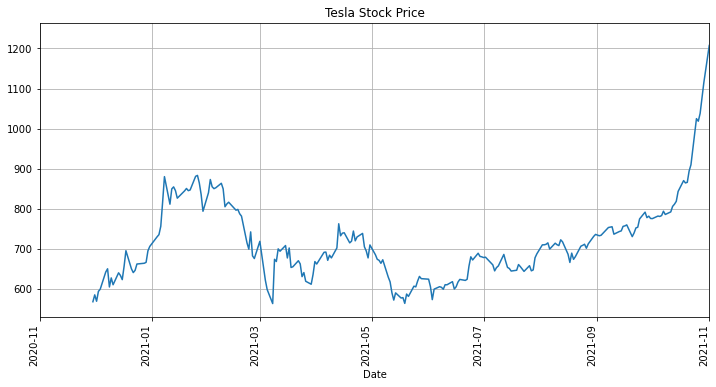

In [18]:
data.plot(label=tick, figsize=(12, 6))
plt.xlabel('Date')
plt.title('Tesla Stock Price')
plt.xticks(rotation=90)
plt.xlim('2020-11','2021-11')
plt.grid()

## Logarithmic (log) returns 

The logarithmic return is one of the best way of calculating the rate of return on an investment.

In [19]:
ret=np.log(data/data.shift(1)) #calculate log return
data=pd.concat([data,ret], axis=1) #combine two series and crate a data frame 
data.columns=['Price', 'Return'] #rename columns
data.dropna(inplace=True) #drop na values
data.tail()

,Price,Return
Date,,
2021-11-19,1137.060059,0.036432
2021-11-22,1156.869995,0.017272
2021-11-23,1109.030029,-0.042232
2021-11-24,1116.000000,0.006265
2021-11-26,1081.920044,-0.031014


## Annualized Volatility 

Volatility is measured by calculating the standard deviation of the annualized returns over a given period of time. It shows the range to which the price of a security may increase or decrease. Therefore, it is important to know it before creating option strategy to be aware of the risk.

In [115]:
vol = np.sqrt(len(df)) * ret.std()
print ('The annualised volatility is' , round(vol*100,2), '%')

The annualised volatility is 54.0 %


## Rolling Statistics


Rolling is a very useful operation for time series data. Rolling means creating a rolling window with a specified size and perform calculations on the data in this window which, of course, rolls through the data.

In [21]:
w=20    # 20 days moving average is used to get more significant results. 
data['min'] = data['Price'].rolling(w).min()
data['max'] = data['Price'].rolling(w).max()
data['std'] = data['Price'].rolling(w).std()
data['mean'] = data['Price'].rolling(w).mean()
data['median'] = data['Price'].rolling(w).median()
data['ewma'] = data['Price'].ewm(halflife=0.5, min_periods=14).mean()
data.dropna().head()

,Price,Return,min,max,std,mean,median,ewma
Date,,,,,,,,
2020-12-29,665.989990,0.003459,568.820007,695.000000,31.448480,632.678003,640.085022,665.043709
2020-12-30,694.780029,0.042321,568.820007,695.000000,32.237962,638.179004,641.050018,687.345949
2020-12-31,705.669983,0.015552,593.380005,705.669983,31.249761,645.021503,643.869995,701.088975
2021-01-04,729.770020,0.033582,599.039978,729.770020,34.135765,651.841003,647.919983,722.599758
2021-01-05,735.109985,0.007291,604.479980,735.109985,36.533893,658.644504,649.869995,731.982429


## Simple Moving Average (SMA)

The Simple Moving Average (SMA) is calculated by adding the price of an instrument over a number of time periods and then dividing the sum by the number of time periods.

In [22]:
SMA1=10
SMA2=20
data['SMA1'] = data['Price'].rolling(window=SMA1).mean()
data['SMA2'] = data['Price'].rolling(window=SMA2).mean()
data[['Price', 'SMA1', 'SMA2']].tail()

,Price,SMA1,SMA2
Date,,,
2021-11-19,1137.060059,1074.189001,1103.026498
2021-11-22,1156.869995,1073.582007,1109.626999
2021-11-23,1109.030029,1082.135010,1114.157001
2021-11-24,1116.000000,1086.940015,1118.064001
2021-11-26,1081.920044,1088.781018,1118.308002


## Distribution of Stock 

The probability distribution of a time series describes the probability that an observation falls into a specified range of values.

/Users/yohanguney/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


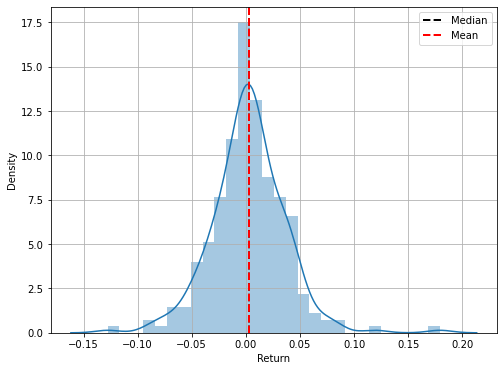

In [24]:
plt.figure(figsize=(8,6))
ax=sns.distplot(data['Return'])
ax.axvline(data['Return'].median(), color='black', ls='--', label='Median',lw=2)
ax.axvline(data['Return'].mean(), color='red', ls='--', label='Mean',lw=2)
plt.legend(loc=0)
plt.grid(True)

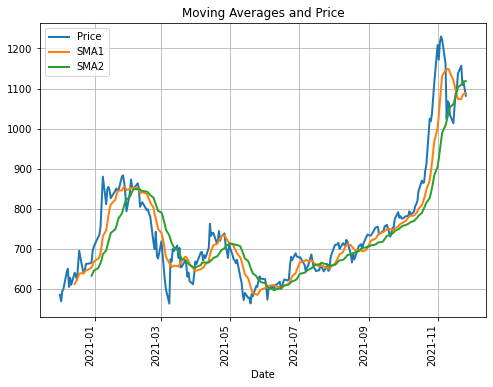

In [23]:
SMA1=10
SMA2=20
data['SMA1'] = data['Price'].rolling(window=SMA1).mean()
data['SMA2'] = data['Price'].rolling(window=SMA2).mean()
data[['Price', 'SMA1', 'SMA2']].plot(figsize=(8,6), grid=True, lw=2)
plt.title('Moving Averages and Price')
plt.xticks(rotation=90)
plt.show()

# Option Pricing Models

I chose Monte Carlo and Black Scholes model to calculate option price.

## Monte Carlo Simulation

Monte Carlo simulations are used to model the probability of different outcomes in a process that cannot easily be predicted due to the intervention of random variables.

In [25]:
def mcs_simulation_np(m,n):       #m is the number of steps and n is the number of simulation
    M = m
    I = n
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [86]:
S0 = 1080                 # spot stock price
K = 750                  # strike
T = 0.50                # maturity 
r = 0.0147                # risk free rate 
sigma = 0.54            # diffusion coefficient or volatility
N = 90                   # number of periods or number of time steps  
payoff = "call"         # payoff 

In [87]:
S = mcs_simulation_np(90,20000)

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

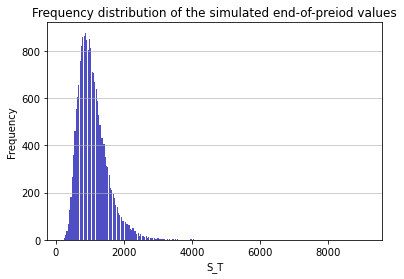

In [88]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[-1,:], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [89]:
print('Mean of Simulated Prices is {} and standard deviation is "{}!"'.format(S.mean().round(2), S.std().round(2)))

Mean of Simulated Prices is 1084.73 and standard deviation is "301.54!"


In [90]:
p = np.mean(np.maximum(S[-1,:] - K,0))
print('European call', str(p))

European call 372.47744739563166


## Black & Scholes Model

Black&Scholes model estimates the theoretical value of derivatives other investment instruments, taking into account the impact of time and other risk factors.

In [80]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [81]:
euro_option_bs(1080, 750, 0.50, 0.0147, 0.54, 'call')

365.10591486022327

In [82]:
S = np.linspace(580,1580,11)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i], 750, 0.50 , 0.0147, 0.54, 'call')

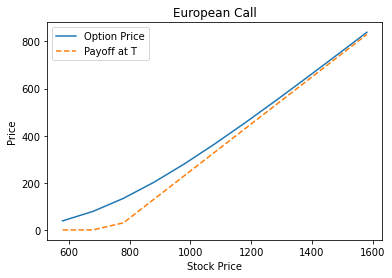

In [83]:
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(S-K,0), '--')
plt.xlabel('Stock Price')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price','Payoff at T'])

In [84]:
T = np.linspace(0.25,1,12)
cpd = np.zeros((len(T),1))
for i in range(len(T)):
    cpd [i] = euro_option_bs(1080, 750, T[i], 0.0147, 0.54, 'call')

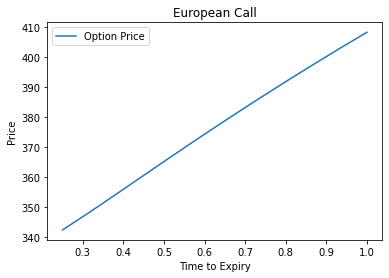

In [85]:
fig = plt.figure()
plt.plot(T, cpd, '-')
plt.xlabel('Time to Expiry')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price'])

# Greeks 

## Delta

Delta measures how much an option's price can be expected to move for every $1 change in the price of the underlying security or index.

In [37]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [38]:
delta(1080, 750, 0.50, 0.0147, 0, 0.54, 'call')

0.8780181896803677

In [107]:
S = np.linspace(580,1580,11)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 750, 0.50, 0.0147, 0, 0.54, 'call')

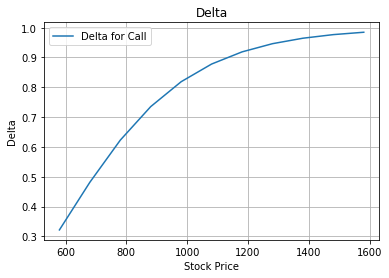

In [108]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')

plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call'])

In [91]:
S = np.linspace(580, 1580, 51)
T = np.linspace(0.25, 1, 51)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 750, T[i], 0.0147, 0, 0.54, 'call')

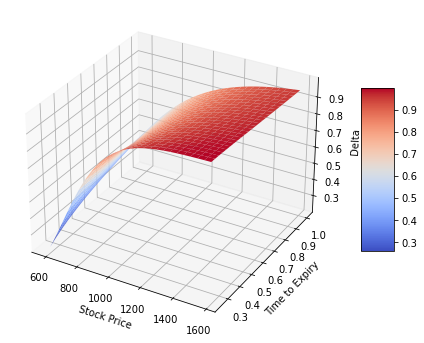

In [92]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [93]:
d = delta(1080, 750, 0.50, 0.0147, 0, 0.54, 'call')
print('The value of Delta is', d.round(4),'.','If the stock price increase 1 dollar, then the value of the option will increase $', d.round(4), '.')

The value of Delta is 0.878 . If the stock price increase 1 dollar, then the value of the option will increase $ 0.878 .


# Gamma

Gamma is the rate of change in an option's delta per 1-point move in the underlying asset's price.

In [41]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [42]:
gamma(1080, 750, 0.50, 0.0147, 0, 0.54, 'call')

0.000490705203080462

In [43]:
S = np.linspace(580,1580,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 750, 0.50, 0.0147, 0, 0.54, 'call')

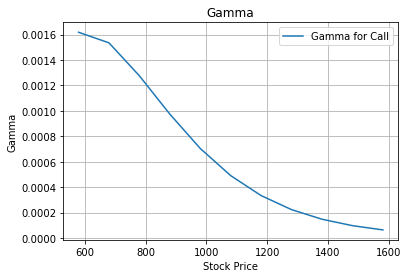

In [44]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call'])

In [94]:
S = np.linspace(580, 1580, 11)
T = np.linspace(0.25, 1, 11)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 750, T[i], 0.0147, 0, 0.54, 'call')

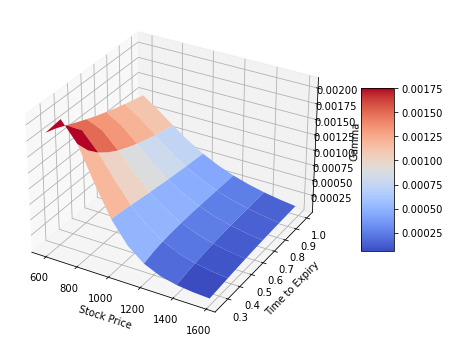

In [95]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

## Speed

Speed measures the rate of change in Gamma with respect to changes in the underlying price.

In [45]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [46]:
speed(1080, 750, 0.50, 0.0147, 0, 0.54, 'call')

-1.301626234949468e-06

In [72]:
S = np.linspace(580,1580,11)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 750, 0.50, 0.0147, 0, 0.54, 'call')

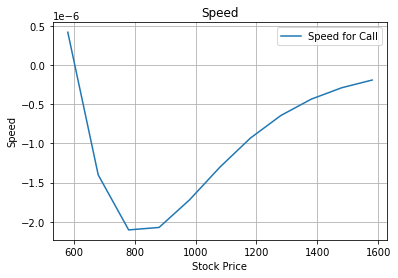

In [73]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Call'])

In [96]:
S = np.linspace(580, 1580, 11)
T = np.linspace(0.25, 1, 11)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 750, T[i], 0.0147, 0, 0.54, 'call')

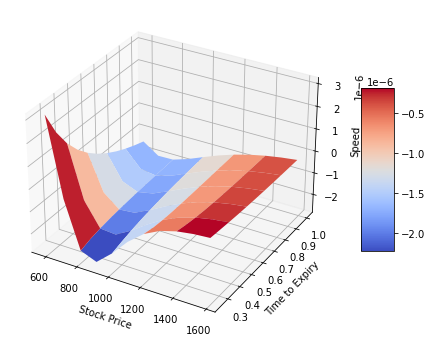

In [97]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

## Theta 

Theta refers to the rate of change in the value of an option over time.

In [49]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [50]:
theta(1080, 750, 0.50, 0.0147, 0, 0.54, 'call')

92.02223625661105

In [118]:
T = np.linspace(0.25,1,12)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(1080, 750, T[i], 0.0147, 0, 0.54, 'call')

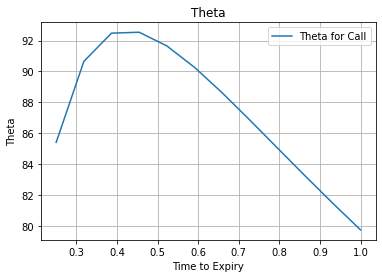

In [119]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')

plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call'])

In [98]:
S = np.linspace(580, 1580, 51)
T = np.linspace(0.25, 1, 51)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 750, T[i], 0.0147, 0, 0.54, 'call')

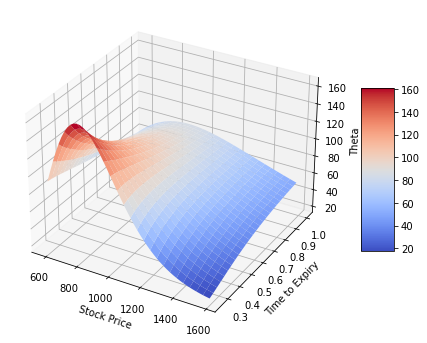

In [99]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

## Rho 

Rho measures the price change for a derivative relative to a change in the risk-free rate of interest.

In [58]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [65]:
rho(1080, 750, 0.50, 0.0147, 0, 0.54, 'call')

291.5768649972869

In [62]:
r = np.linspace(0,1,11)
Rho_Call = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(1080, 750, 0.50, r[i], 0, 0.54, 'call')
    

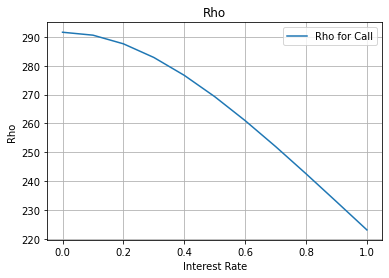

In [63]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call'])

In [100]:
S = np.linspace(580, 1580, 51)
T = np.linspace(0.25,1, 51)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 750, T[i], 0.0147, 0, 0.54, 'call')

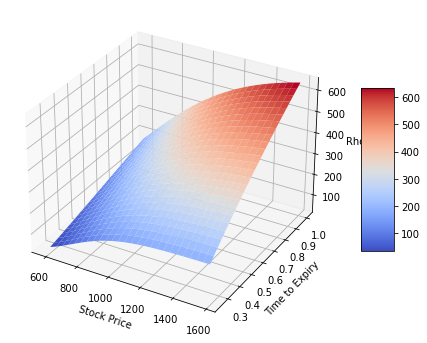

In [101]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

## Vega 

Vega measures an option price's value relative to changes in implied volatility of an underlying asset.

In [66]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [67]:
vega(1080, 750, 0.50, 0.0147, 0, 0.54, 'call')

154.53680819572375

In [74]:
vol = np.linspace(0.1,0.9,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(1080, 750, 0.50, 0.0147, 0, vol[i], 'call')

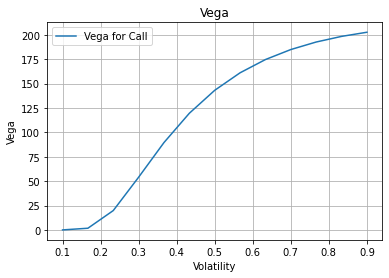

In [75]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Call'])

In [102]:
S = np.linspace(580, 1580, 51)
T = np.linspace(0.25, 1, 51)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 750, T[i], 0.0147, 0, 0.54, 'call')

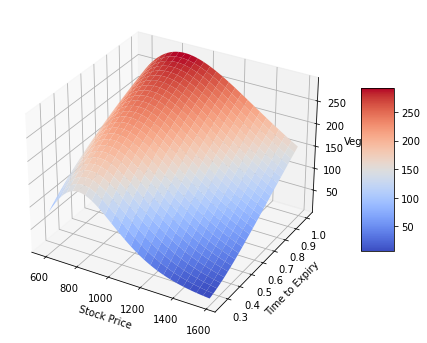

In [103]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [104]:
v = vega(1080, 750, 0.50, 0.0147, 0, 0.54, 'call')
print('The value of Vega is', v.round(4),'.','If the volatility increases 1%, then the value of the option will increase $', v.round(4)*0.01, '.')

The value of Vega is 154.5368 . If the volatility increases 1%, then the value of the option will increase $ 1.545368 .
